# In this notebook I explore how many vectors I should create with LSA for my modeling.  The notebook will all be spent on creating this ROC graph below

Text(0.5,1,'ROCs for Different LSA Topics')

<Figure size 432x288 with 0 Axes>

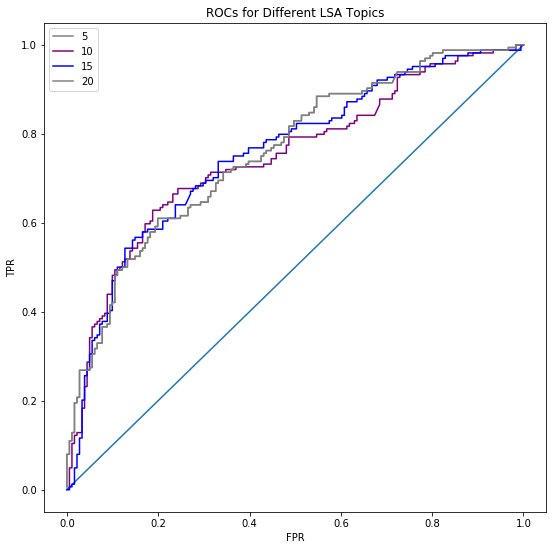

In [73]:
fpr_5, tpr_5,_ = roc_curve(y_test, y_score_5)
roc_auc_5 = auc(fpr_5, tpr_5)

fpr_10, tpr_10,_ = roc_curve(y_test, y_score_10)
roc_auc_10 = auc(fpr_10, tpr_10)

fpr_15, tpr_15,_ = roc_curve(y_test, y_score_15)
roc_auc_15 = auc(fpr_15, tpr_15)

fpr_20, tpr_20,_ = roc_curve(y_test, y_score_20)
roc_auc_20 = auc(fpr_20, tpr_20)


plt.figure()
plt.figure(figsize=(9,9))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
line1 = plt.plot(fpr_5,tpr_5, label = '5', color = 'grey')
line2 = plt.plot(fpr_10,tpr_10, label = '10', color = 'purple')
line3 = plt.plot(fpr_15,tpr_15, label = '15', color = 'blue')
line4 = plt.plot(fpr_20,tpr_20, label = '20', color = 'grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROCs for Different LSA Topics')

In [1]:
import pandas as pd
import numpy 
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame.from_csv("CleanedApril2018.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [4]:
y = df["Outcome"]

# Count Vec 5 Components LSA Naive Bayes

In [21]:
keywords = df['keywords']

In [22]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(keywords)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=keywords, columns=vectorizer.get_feature_names()).head(10)

,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
keywords,,,,,,,,,,,,,,,,,,,,,
"['Workplace Hazards and Violations', 'Football', 'Cheerleaders', 'Discrimination', 'Sexual Harassment', 'National Football League', 'Davis, Bailey', 'Goodell, Roger']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Environmental Protection Agency', 'Pruitt, Scott', 'United States Politics and Government', 'Research']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Restaurants', 'Noma (Copenhagen, Restaurant)', 'Redzepi, Rene', 'Copenhagen (Denmark)']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Texas', 'Soil', 'Pregnancy and Childbirth', 'New York Times']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Bicycles and Bicycling', 'Google Maps', 'Commuting']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Hackett, Jim', 'Ford Motor Co', 'Automobiles', 'Sports Utility Vehicles and Light Trucks', 'Trucks and Trucking']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Romney, Mitt', 'Elections, Senate', 'Utah', 'Republican Party', 'Trump, Donald J']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Social Media', 'Conservatism (US Politics)', 'Bone, Kenneth (1982- )', 'Damore, James', 'Lipset, Seymour Martin']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Francis', 'Roman Catholic Church', 'Karadima, Fernando', 'Sex Crimes', 'Priests', 'Pell, George (1941- )', 'Chile']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
lsa = TruncatedSVD(5, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [24]:
s = pd.DataFrame(dtm_lsa.round(5), index = keywords, columns = ["component_1","component_2","component_3","component_4","component_5"])


In [25]:
X = s[["component_1","component_2","component_3","component_4","component_5"]]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.naive_bayes import GaussianNB

clf5 = GaussianNB()

In [28]:
clf5.fit(X_train, y_train)

GaussianNB(priors=None)

In [29]:
clf5.score(X_train, y_train)

0.6944099378881987

In [30]:
clf5.score(X_test, y_test)

0.6753623188405797

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, clf5.predict(X_test)))

             precision    recall  f1-score   support

          0       0.69      0.69      0.69       181
          1       0.66      0.66      0.66       164

avg / total       0.68      0.68      0.68       345



In [33]:
y_score_5 = clf5.predict_proba(X_test)[:,1]

# Count Vec 10 Components LSA Naive Bayes

In [55]:
keywords = df['keywords']

In [56]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(keywords)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=keywords, columns=vectorizer.get_feature_names()).head(10)

,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
keywords,,,,,,,,,,,,,,,,,,,,,
"['Workplace Hazards and Violations', 'Football', 'Cheerleaders', 'Discrimination', 'Sexual Harassment', 'National Football League', 'Davis, Bailey', 'Goodell, Roger']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Environmental Protection Agency', 'Pruitt, Scott', 'United States Politics and Government', 'Research']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Restaurants', 'Noma (Copenhagen, Restaurant)', 'Redzepi, Rene', 'Copenhagen (Denmark)']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Texas', 'Soil', 'Pregnancy and Childbirth', 'New York Times']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Bicycles and Bicycling', 'Google Maps', 'Commuting']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Hackett, Jim', 'Ford Motor Co', 'Automobiles', 'Sports Utility Vehicles and Light Trucks', 'Trucks and Trucking']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Romney, Mitt', 'Elections, Senate', 'Utah', 'Republican Party', 'Trump, Donald J']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Social Media', 'Conservatism (US Politics)', 'Bone, Kenneth (1982- )', 'Damore, James', 'Lipset, Seymour Martin']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Francis', 'Roman Catholic Church', 'Karadima, Fernando', 'Sex Crimes', 'Priests', 'Pell, George (1941- )', 'Chile']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
lsa = TruncatedSVD(10, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [58]:
s = pd.DataFrame(dtm_lsa.round(5), index = keywords, columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"])


In [59]:
X = s[["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"]]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.naive_bayes import GaussianNB

clf10 = GaussianNB()

In [62]:
clf10.fit(X_train, y_train)

GaussianNB(priors=None)

In [63]:
clf10.score(X_train, y_train)

0.7105590062111802

In [64]:
clf10.score(X_test, y_test)

0.7159420289855073

In [65]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, clf10.predict(X_test)))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74       181
          1       0.73      0.64      0.68       164

avg / total       0.72      0.72      0.71       345



In [66]:
y_score_10 = clf10.predict_proba(X_test)[:,1]

# Count Vec 15 Components LSA Naive Bayes

In [6]:
keywords = df['keywords']

In [8]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(keywords)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=keywords, columns=vectorizer.get_feature_names()).head(10)

,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
keywords,,,,,,,,,,,,,,,,,,,,,
"['Workplace Hazards and Violations', 'Football', 'Cheerleaders', 'Discrimination', 'Sexual Harassment', 'National Football League', 'Davis, Bailey', 'Goodell, Roger']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Environmental Protection Agency', 'Pruitt, Scott', 'United States Politics and Government', 'Research']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Restaurants', 'Noma (Copenhagen, Restaurant)', 'Redzepi, Rene', 'Copenhagen (Denmark)']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Texas', 'Soil', 'Pregnancy and Childbirth', 'New York Times']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Bicycles and Bicycling', 'Google Maps', 'Commuting']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Hackett, Jim', 'Ford Motor Co', 'Automobiles', 'Sports Utility Vehicles and Light Trucks', 'Trucks and Trucking']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Romney, Mitt', 'Elections, Senate', 'Utah', 'Republican Party', 'Trump, Donald J']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Social Media', 'Conservatism (US Politics)', 'Bone, Kenneth (1982- )', 'Damore, James', 'Lipset, Seymour Martin']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Francis', 'Roman Catholic Church', 'Karadima, Fernando', 'Sex Crimes', 'Priests', 'Pell, George (1941- )', 'Chile']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
lsa = TruncatedSVD(15, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [10]:
s = pd.DataFrame(dtm_lsa.round(5), index = keywords, columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10", "component_11", "component_12", "component_13", "component_14", "component_15"])


In [11]:
X = s[["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10", "component_11", "component_12", "component_13", "component_14", "component_15"]]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [14]:
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
clf.score(X_train, y_train)

0.7018633540372671

In [16]:
clf.score(X_test, y_test)

0.6869565217391305

In [17]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.71      0.68      0.69       181
          1       0.66      0.70      0.68       164

avg / total       0.69      0.69      0.69       345



In [18]:
y_score_15 = clf.predict_proba(X_test)[:,1]

# Count Vec 20 Components LSA Naive Bayes


In [37]:
keywords = df['keywords']

In [38]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(keywords)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=keywords, columns=vectorizer.get_feature_names())

,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
keywords,,,,,,,,,,,,,,,,,,,,,
"['Workplace Hazards and Violations', 'Football', 'Cheerleaders', 'Discrimination', 'Sexual Harassment', 'National Football League', 'Davis, Bailey', 'Goodell, Roger']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Environmental Protection Agency', 'Pruitt, Scott', 'United States Politics and Government', 'Research']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Restaurants', 'Noma (Copenhagen, Restaurant)', 'Redzepi, Rene', 'Copenhagen (Denmark)']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Texas', 'Soil', 'Pregnancy and Childbirth', 'New York Times']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Bicycles and Bicycling', 'Google Maps', 'Commuting']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Hackett, Jim', 'Ford Motor Co', 'Automobiles', 'Sports Utility Vehicles and Light Trucks', 'Trucks and Trucking']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Romney, Mitt', 'Elections, Senate', 'Utah', 'Republican Party', 'Trump, Donald J']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Social Media', 'Conservatism (US Politics)', 'Bone, Kenneth (1982- )', 'Damore, James', 'Lipset, Seymour Martin']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Francis', 'Roman Catholic Church', 'Karadima, Fernando', 'Sex Crimes', 'Priests', 'Pell, George (1941- )', 'Chile']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
lsa = TruncatedSVD(20, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [40]:
lsa.explained_variance_ratio_

array([0.07978307, 0.0291658 , 0.02155564, 0.02152364, 0.01969355,
       0.01601555, 0.01428968, 0.01250726, 0.01185049, 0.01201224,
       0.01047657, 0.01037908, 0.00982712, 0.0093185 , 0.00794364,
       0.00726572, 0.00736538, 0.0071846 , 0.00681388, 0.0065168 ])

In [41]:
pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10", "component_11", "component_12", "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", "component_19", "component_20"],columns = vectorizer.get_feature_names())


,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
component_1,0.00048,0.00153,0.00002,0.00125,0.00002,0.00001,0.00011,0.00000,0.00004,0.00001,...,0.00002,0.00250,0.00004,0.00001,0.00002,0.00145,0.00000,0.00009,0.00530,0.00043
component_2,-0.00152,0.00498,0.00029,-0.00247,0.00029,-0.00000,-0.00076,-0.00000,0.00005,-0.00000,...,0.00009,0.00102,0.00016,-0.00001,0.00007,-0.00494,0.00000,0.00124,0.01083,0.00055
component_3,0.00010,0.01907,0.00015,-0.00045,0.00015,0.00001,-0.00003,0.00005,0.00020,0.00001,...,0.00010,0.00026,0.00004,0.00014,0.00017,-0.00071,0.00000,0.00655,-0.00253,0.00088
component_4,0.00030,-0.00324,0.00036,0.00160,0.00036,-0.00002,0.00052,0.00001,0.00001,-0.00002,...,-0.00007,-0.00228,0.00001,0.00003,-0.00009,0.00438,0.00001,-0.00001,0.01015,-0.00194
component_5,-0.00004,0.00887,0.00027,-0.00085,0.00027,0.00004,-0.00022,0.00001,0.00012,0.00004,...,0.00030,0.00223,-0.00002,0.00003,0.00010,-0.00182,0.00002,0.00197,0.03253,0.00171
component_6,0.00043,0.02965,0.00070,0.00046,0.00070,-0.00000,0.00096,0.00004,0.00028,-0.00000,...,0.00011,-0.00500,0.00014,0.00011,-0.00008,0.00527,0.00001,0.01450,-0.00545,-0.00127
component_7,0.00421,-0.00154,0.00015,-0.00328,0.00015,0.00002,0.00299,0.00006,0.00033,0.00002,...,-0.00006,-0.00015,0.00013,0.00012,0.00003,-0.00052,0.00001,-0.00039,0.00455,-0.00048
component_8,-0.00024,0.01403,0.00532,0.00119,0.00532,0.00014,-0.00064,0.00011,0.00065,0.00014,...,0.00079,0.00762,-0.00001,0.00011,-0.00033,-0.00621,0.00003,0.00229,0.01760,0.00120
component_9,0.00003,0.00051,0.00844,-0.00046,0.00844,0.00006,0.00102,0.00003,0.00046,0.00006,...,0.00037,-0.00326,0.00072,0.00010,0.00021,0.00337,0.00001,-0.00177,0.00480,-0.00033
component_10,0.00002,-0.02233,0.00506,-0.00027,0.00506,-0.00006,0.00037,-0.00002,-0.00050,-0.00006,...,-0.00088,-0.00353,-0.00003,-0.00008,0.00047,0.00049,0.00002,-0.00691,-0.01564,-0.00066


In [42]:
s = pd.DataFrame(dtm_lsa.round(5), index = keywords, columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10", "component_11", "component_12", "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", "component_19", "component_20"])
#pd.DataFrame(dtm_lsa.round(5), index = range(6), columns = ["component_1","component_2" ]

In [43]:
X = s[["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10", "component_11", "component_12", "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", "component_19", "component_20"]]

In [44]:
from sklearn.naive_bayes import GaussianNB

clf20 = GaussianNB()

In [45]:
clf20.fit(X_train, y_train)

GaussianNB(priors=None)

In [46]:
clf20.score(X_train, y_train)

0.6944099378881987

In [47]:
clf20.score(X_test, y_test)

0.6753623188405797

In [48]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, clf20.predict(X_test)))

             precision    recall  f1-score   support

          0       0.69      0.69      0.69       181
          1       0.66      0.66      0.66       164

avg / total       0.68      0.68      0.68       345



In [49]:
y_score_20 = clf20.predict_proba(X_test)[:,1]

Text(0.5,1,'ROCs for Different LSA Topics')

<Figure size 432x288 with 0 Axes>

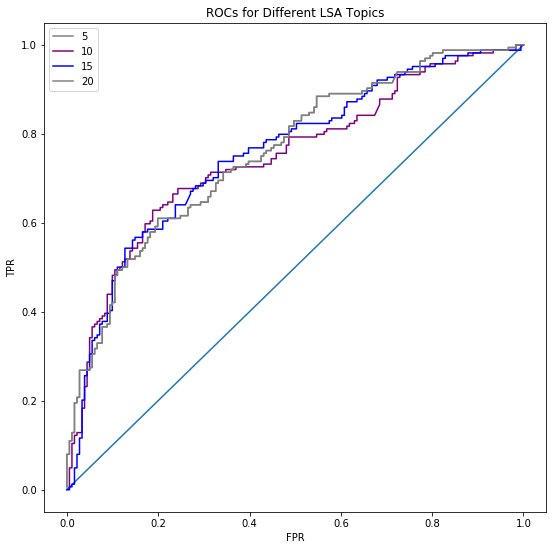

In [73]:
fpr_5, tpr_5,_ = roc_curve(y_test, y_score_5)
roc_auc_5 = auc(fpr_5, tpr_5)

fpr_10, tpr_10,_ = roc_curve(y_test, y_score_10)
roc_auc_10 = auc(fpr_10, tpr_10)

fpr_15, tpr_15,_ = roc_curve(y_test, y_score_15)
roc_auc_15 = auc(fpr_15, tpr_15)

fpr_20, tpr_20,_ = roc_curve(y_test, y_score_20)
roc_auc_20 = auc(fpr_20, tpr_20)


plt.figure()
plt.figure(figsize=(9,9))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
line1 = plt.plot(fpr_5,tpr_5, label = '5', color = 'grey')
line2 = plt.plot(fpr_10,tpr_10, label = '10', color = 'purple')
line3 = plt.plot(fpr_15,tpr_15, label = '15', color = 'blue')
line4 = plt.plot(fpr_20,tpr_20, label = '20', color = 'grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROCs for Different LSA Topics')